<a href="https://colab.research.google.com/github/bodamohannaik/DLAI-TF-DPC/blob/master/C2/W3/c2_w3_cats_and_dogs_lab1_data_augmentation_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import zipfile

# Download Dataset

In [ ]:
!curl -O https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0  27.1M      0  0:00:02  0:00:02 --:--:-- 27.1M
cats_and_dogs_filtered.zip  data  sample_data


In [ ]:
with zipfile.ZipFile('cats_and_dogs_filtered.zip', 'r') as zipfp:
  zipfp.extractall(path = "./data")
!ls ./data/cats_and_dogs_filtered

train  validation  vectorize.py


In [ ]:
# train directory
train_dir = "./data/cats_and_dogs_filtered/train"
!ls ./data/cats_and_dogs_filtered/train

cats  dogs


In [ ]:
validation_dir = "./data/cats_and_dogs_filtered/validation"
!ls ./data/cats_and_dogs_filtered/validation

cats  dogs


# Visualize Images

In [ ]:
def random_pet_image(pet_directory, number_of_images=4, target_size=None):
  """
  yield random number_of_images pet image array representation 
  """
  # all files in the pet directory
  files = os.listdir(pet_directory)
  # select random image files
  selected = np.random.choice(files, size=number_of_images, replace=False)
  # yield each image array representation
  for file in selected:
    # full path to the image
    file_path = os.path.join(pet_directory, file)
    # load image
    img = tf.keras.preprocessing.image.load_img(file_path, color_mode='rgb', target_size = target_size)
    # convert to numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img,dtype=np.uint8)
    print(f"File : {file_path}, shape: {img_array.shape} ")
    yield img_array

In [ ]:
def plot_random_pet_images(dir, number_of_images=4, pets= ['cats', 'dogs']):
  """
  Plot random pet images
  """
  fig, axs = plt.subplots(nrows=len(pets), ncols=number_of_images, figsize=(6*number_of_images, 6*len(pets)))
  for pet_idx in range(len(pets)) :
    for img_idx, img_array in enumerate(random_pet_image(pet_directory=os.path.join(dir, pets[pet_idx]), number_of_images=number_of_images)):
      ax = axs[pet_idx, img_idx]
      ax.imshow(img_array)


File : ./data/cats_and_dogs_filtered/train/cats/cat.724.jpg, shape: (455, 368, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.85.jpg, shape: (336, 447, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.870.jpg, shape: (316, 319, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.502.jpg, shape: (243, 250, 3) 
File : ./data/cats_and_dogs_filtered/train/cats/cat.738.jpg, shape: (334, 499, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.320.jpg, shape: (357, 370, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.18.jpg, shape: (348, 215, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.230.jpg, shape: (375, 499, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.492.jpg, shape: (375, 499, 3) 
File : ./data/cats_and_dogs_filtered/train/dogs/dog.752.jpg, shape: (384, 500, 3) 


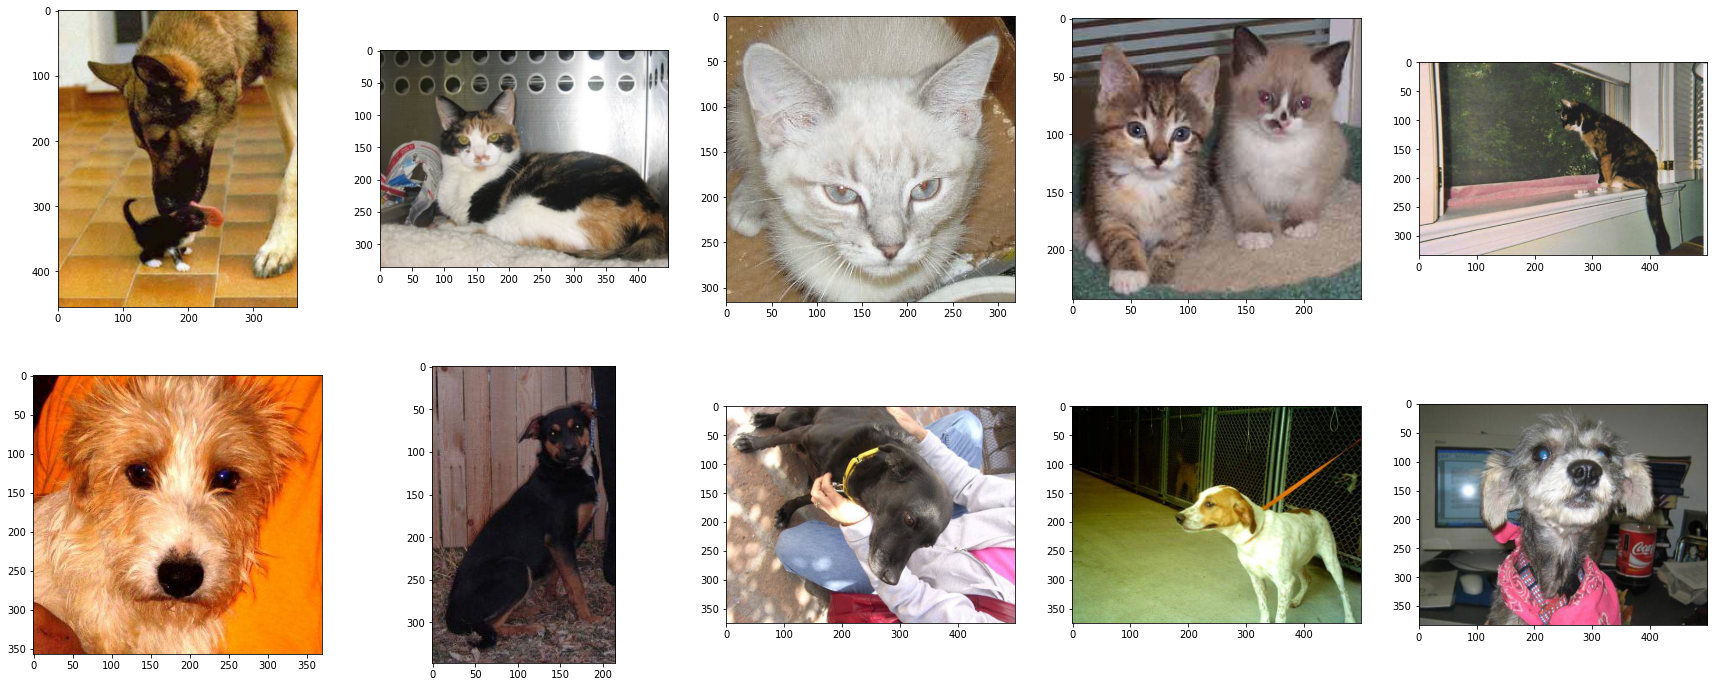

In [ ]:
plot_random_pet_images(dir=train_dir, number_of_images=5, pets= ['cats', 'dogs'])

File : ./data/cats_and_dogs_filtered/validation/cats/cat.2137.jpg, shape: (499, 314, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2077.jpg, shape: (315, 499, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2016.jpg, shape: (273, 249, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2474.jpg, shape: (320, 499, 3) 
File : ./data/cats_and_dogs_filtered/validation/cats/cat.2306.jpg, shape: (374, 500, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2460.jpg, shape: (386, 499, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2223.jpg, shape: (390, 499, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2144.jpg, shape: (420, 380, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg, shape: (500, 355, 3) 
File : ./data/cats_and_dogs_filtered/validation/dogs/dog.2053.jpg, shape: (374, 500, 3) 


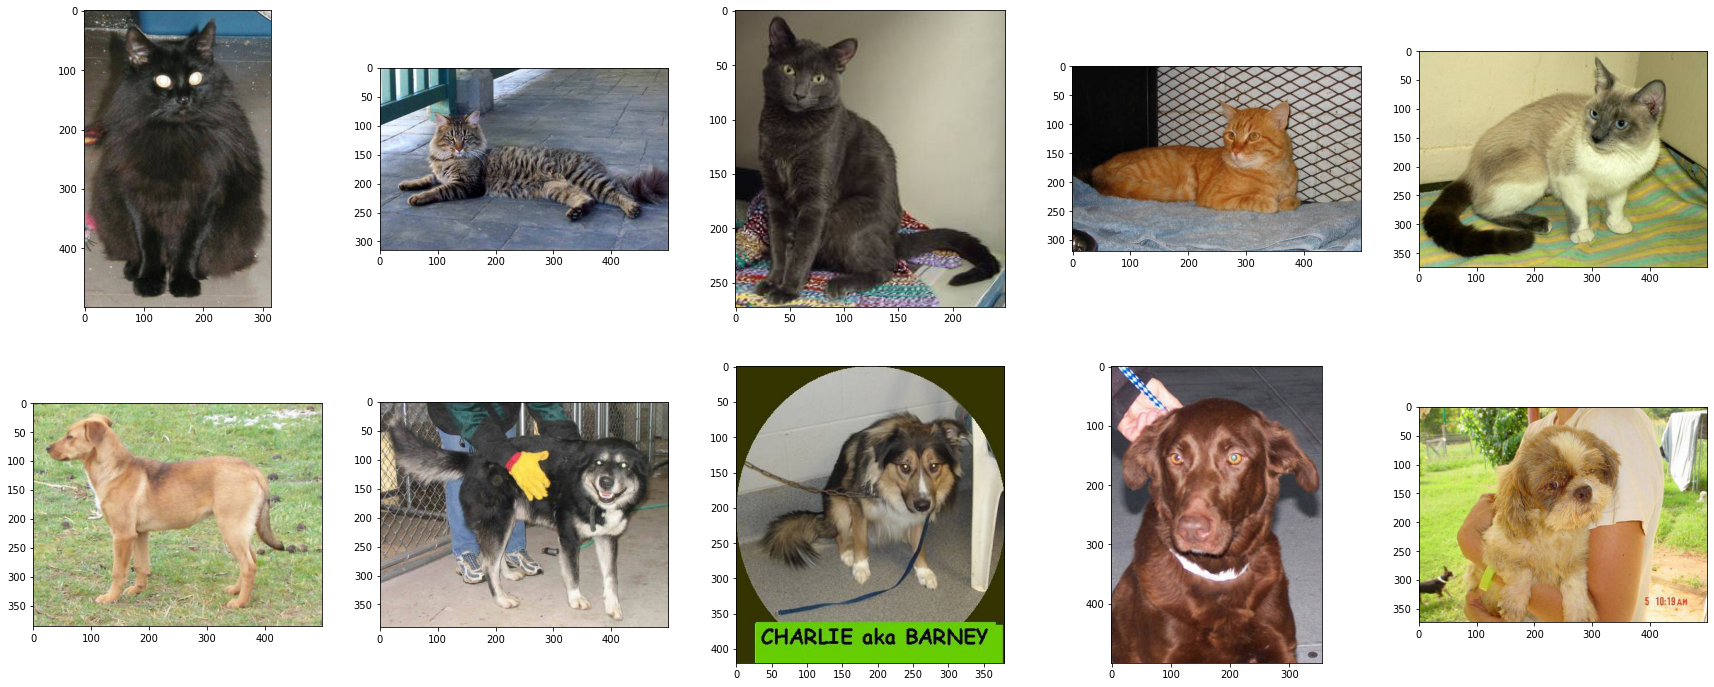

In [ ]:
plot_random_pet_images(dir=validation_dir, number_of_images=5, pets= ['cats', 'dogs'])

# Parameters

In [ ]:
# epochs
epochs = 25
target_size = (150, 150)
batch_size = 32

# Data Preparation

In [ ]:
def get_train_gen_without_augmentation():
  train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator()
  train_gen = train_img_gen.flow_from_directory(directory=train_dir, target_size=target_size,
                                                color_mode='rgb', class_mode='binary', batch_size=batch_size)
  return train_gen

In [ ]:
def get_train_gen_with_augmentation():
  train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=45, width_shift_range=.2, height_shift_range=.2,
                                                                  shear_range=.2, zoom_range=.2, horizontal_flip=True, vertical_flip=True)
  train_gen = train_img_gen.flow_from_directory(directory=train_dir, target_size=target_size,
                                                color_mode='rgb', class_mode='binary', batch_size=batch_size)
  return train_gen

In [ ]:
def get_validation_gen():
  validation_img_gen = tf.keras.preprocessing.image.ImageDataGenerator()
  validation_gen = validation_img_gen.flow_from_directory(directory=validation_dir, target_size=target_size,
                                                color_mode='rgb', class_mode='binary', batch_size=batch_size)
  return validation_gen

# Predict for new images

In [ ]:
def predict_for_new_images(train_gen, model):
  indices_class = {v:k for k,v in train_gen.class_indices.items()}
  from google.colab import files
  uploaded_files = files.upload()
  for uploaded_file in uploaded_files:
    img = tf.keras.preprocessing.image.load_img(uploaded_file, color_mode='rgb', target_size = target_size)
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    y = model.predict(x)[0]
    label = 0
    if y > 0.5:
      label = 1
    print(f"file: {uploaded_file} belongs to {indices_class[label]}")


# Visualizing Intermediate Representations

In [ ]:
def visualizing_int_representations(pet_directory, model):
  rpi =random_pet_image(pet_directory=pet_directory, number_of_images=1, target_size = target_size)
  x = next(rpi)
  # add batch dimension
  x = np.expand_dims(x, axis=0)
  print(f"input shape : {x.shape}")
  # model
  inputs = model.input
  outputs = [layer.output for layer in  model.layers][1:7]
  layer_names = [layer.name for layer in model.layers][1:7]
  print(layer_names)
  int_model = tf.keras.Model(inputs=inputs, outputs=outputs)
  # int_model.summary()
  x_outputs = int_model.predict(x)
  for layer_name, layer_output in zip(layer_names, x_outputs):
    print(f"Layer Name: {layer_name} , output shape : {layer_output.shape}")
    n_features = layer_output.shape[-1]
    size = layer_output.shape[1]
    display_grid = np.zeros((size, size*n_features))
    for i in range(n_features):
      f = np.array(layer_output[0, :, :, i])
      f -= (f.mean()+0.000000001)
      f /= (f.std()++0.000000001)
      f *= 64
      f += 128
      f = np.clip(a = f, a_min=0, a_max=255).astype(np.uint8)
      display_grid[:, i*size:(i+1)*size] = f
    fig, axs = plt.subplots(figsize=(30, 30/n_features))
    axs.grid(False)
    axs.imshow(display_grid, cmap='Reds', aspect='auto')
    axs.set_title(layer_name)

# Plot Model accuracy and Loss

In [ ]:
def plot_accuracy(history):
  # Accuracy
  fig, axs = plt.subplots(figsize=(20,8))
  axs.plot(history.history['accuracy'], label='training')
  axs.plot(history.history['val_accuracy'], label='validation')
  axs.set_xlabel('epochs')
  axs.set_ylabel('accuracy')
  axs.set_title('Accuracy plot')
  axs.legend()

In [ ]:
def plot_loss(history):
  # Loss
  fig, axs = plt.subplots(figsize=(20,8))
  axs.plot(history.history['loss'], label='training')
  axs.plot(history.history['val_loss'], label='validation')
  axs.set_xlabel('epochs')
  axs.set_ylabel('loss')
  axs.set_title('Loss plot')
  axs.legend()

# CNN

## Neural Network

In [ ]:
model = tf.keras.Sequential( layers = [
    tf.keras.layers.Input(shape = target_size+(3, )),
    # Scaling
    tf.keras.layers.Rescaling(scale=1/255),
    # Convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Convolution
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Flatten
    tf.keras.layers.Flatten(),
    # Dense
    tf.keras.layers.Dense(units=512, activation='relu'),
    # output
    tf.keras.layers.Dense(units=1, activation='sigmoid')]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)       

## Train the Model

In [ ]:
train_gen = get_train_gen_without_augmentation()
validation_gen = get_validation_gen()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])
# fit
history = model.fit(train_gen, epochs=epochs, validation_data=validation_gen )

Epoch 1/25
63/63 [==============================] - 25s 186ms/step - loss: 0.7636 - accuracy: 0.5410 - val_loss: 0.6410 - val_accuracy: 0.6360
Epoch 2/25
63/63 [==============================] - 10s 159ms/step - loss: 0.6328 - accuracy: 0.6310 - val_loss: 0.6238 - val_accuracy: 0.6400
Epoch 3/25
63/63 [==============================] - 10s 158ms/step - loss: 0.5830 - accuracy: 0.6985 - val_loss: 0.5847 - val_accuracy: 0.6940
Epoch 4/25
63/63 [==============================] - 10s 158ms/step - loss: 0.5066 - accuracy: 0.7555 - val_loss: 0.5733 - val_accuracy: 0.7180
Epoch 5/25
63/63 [==============================] - 10s 158ms/step - loss: 0.4351 - accuracy: 0.7925 - val_loss: 0.7944 - val_accuracy: 0.6450
Epoch 6/25
63/63 [==============================] - 10s 159ms/step - loss: 0.3742 - accuracy: 0.8245 - val_loss: 0.6189 - val_accuracy: 0.7000
Epoch 7/25
63/63 [==============================] - 10s 159ms/step - loss: 0.3022 - accuracy: 0.8740 - val_loss: 0.6342 - val_accuracy: 0.7170

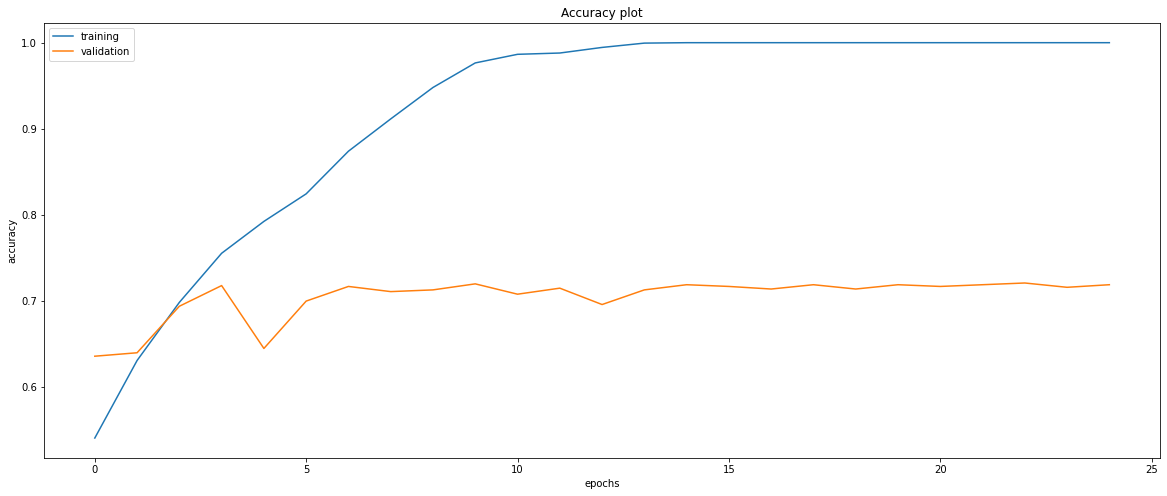

In [ ]:
plot_accuracy(history = history)

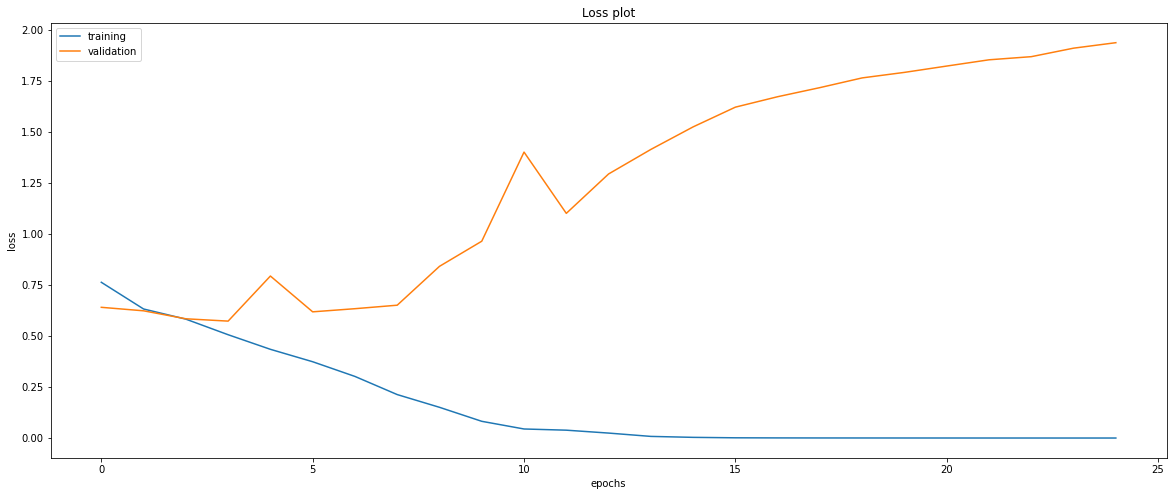

In [ ]:
plot_loss(history=history)

In [44]:
predict_for_new_images(train_gen=train_gen, model=model)

Saving pexels-miguel-constantin-montes-2623968.jpg to pexels-miguel-constantin-montes-2623968.jpg
Saving pexels-kasuma-933498.jpg to pexels-kasuma-933498.jpg
Saving pexels-helena-lopes-2253275.jpg to pexels-helena-lopes-2253275.jpg
Saving pexels-valeria-boltneva-1805164.jpg to pexels-valeria-boltneva-1805164 (1).jpg
Saving cat-g1eddff5da_640.jpg to cat-g1eddff5da_640.jpg
Saving cat-g084e3b60f_640.jpg to cat-g084e3b60f_640.jpg
file: pexels-miguel-constantin-montes-2623968.jpg belongs to dogs
file: pexels-kasuma-933498.jpg belongs to dogs
file: pexels-helena-lopes-2253275.jpg belongs to dogs
file: pexels-valeria-boltneva-1805164.jpg belongs to dogs
file: cat-g1eddff5da_640.jpg belongs to dogs
file: cat-g084e3b60f_640.jpg belongs to dogs


# CNN with Augmentation

## Neural Network

In [45]:
model = tf.keras.Sequential( layers = [
    tf.keras.layers.Input(shape = target_size+(3, )),
    # Scaling
    tf.keras.layers.Rescaling(scale=1/255),
    # Convolution
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Convolution
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Convolution
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    # Flatten
    tf.keras.layers.Flatten(),
    # Dense
    tf.keras.layers.Dense(units=512, activation='relu'),
    # output
    tf.keras.layers.Dense(units=1, activation='sigmoid')]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)       

## Train the Model

In [46]:
train_gen = get_train_gen_with_augmentation()
validation_gen = get_validation_gen()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [47]:
# compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])
# fit
history = model.fit(train_gen, epochs=epochs, validation_data=validation_gen )

Epoch 1/25
63/63 [==============================] - 21s 325ms/step - loss: 0.7284 - accuracy: 0.5110 - val_loss: 0.6923 - val_accuracy: 0.5240
Epoch 2/25
63/63 [==============================] - 20s 315ms/step - loss: 0.6924 - accuracy: 0.5380 - val_loss: 0.6922 - val_accuracy: 0.4990
Epoch 3/25
63/63 [==============================] - 20s 315ms/step - loss: 0.6926 - accuracy: 0.5235 - val_loss: 0.6927 - val_accuracy: 0.4970
Epoch 4/25
63/63 [==============================] - 20s 317ms/step - loss: 0.6917 - accuracy: 0.5300 - val_loss: 0.6882 - val_accuracy: 0.5970
Epoch 5/25
63/63 [==============================] - 20s 315ms/step - loss: 0.6881 - accuracy: 0.5565 - val_loss: 0.6885 - val_accuracy: 0.5060
Epoch 6/25
63/63 [==============================] - 20s 323ms/step - loss: 0.6826 - accuracy: 0.5565 - val_loss: 0.6619 - val_accuracy: 0.5860
Epoch 7/25
63/63 [==============================] - 20s 318ms/step - loss: 0.6773 - accuracy: 0.5770 - val_loss: 0.6562 - val_accuracy: 0.6180

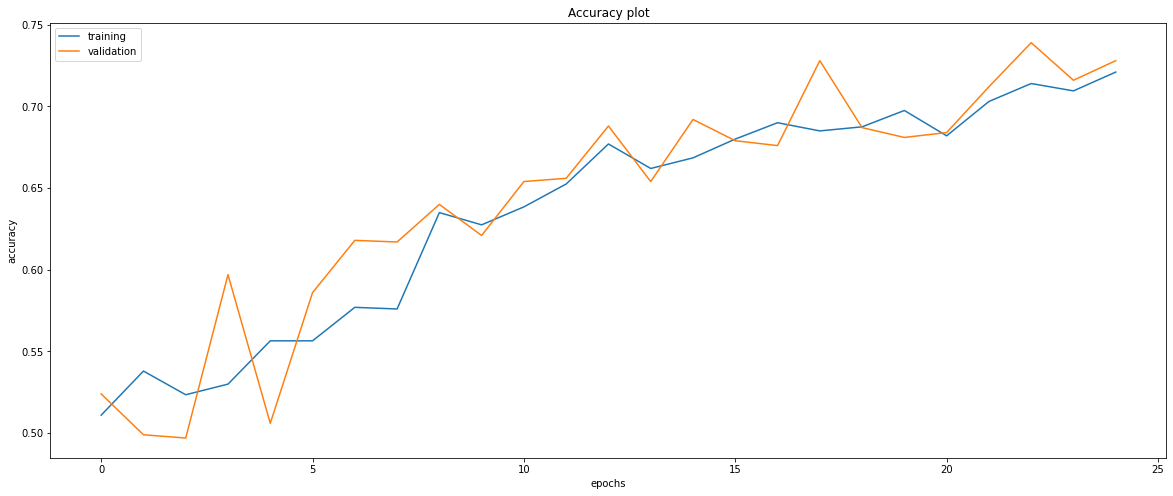

In [48]:
plot_accuracy(history = history)

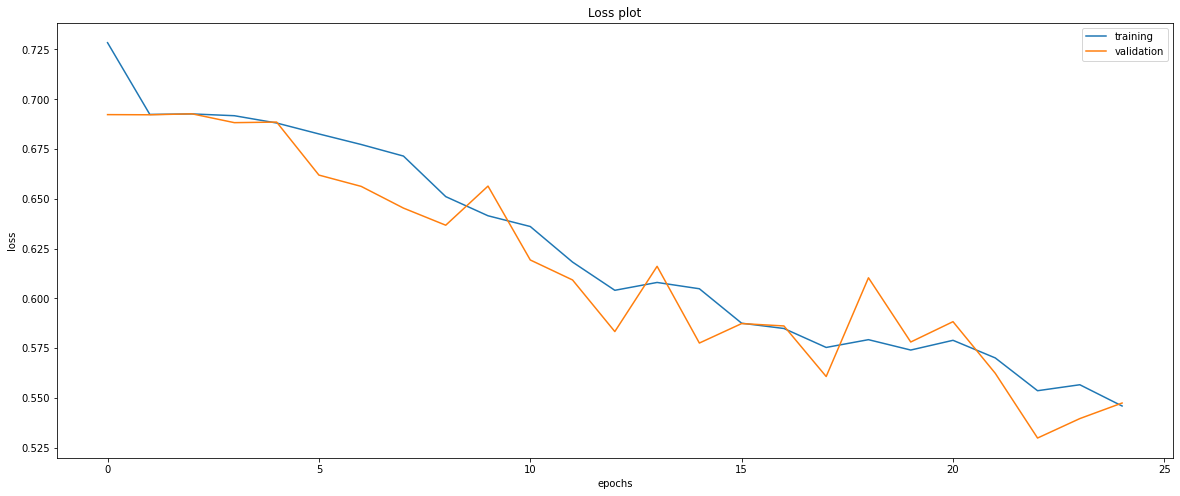

In [49]:
plot_loss(history=history)

In [50]:
predict_for_new_images(train_gen=train_gen, model=model)

Saving pexels-miguel-constantin-montes-2623968.jpg to pexels-miguel-constantin-montes-2623968 (1).jpg
Saving pexels-kasuma-933498.jpg to pexels-kasuma-933498 (1).jpg
Saving pexels-helena-lopes-2253275.jpg to pexels-helena-lopes-2253275 (1).jpg
Saving pexels-valeria-boltneva-1805164.jpg to pexels-valeria-boltneva-1805164 (2).jpg
Saving cat-g1eddff5da_640.jpg to cat-g1eddff5da_640 (1).jpg
Saving cat-g084e3b60f_640.jpg to cat-g084e3b60f_640 (1).jpg
file: pexels-miguel-constantin-montes-2623968.jpg belongs to cats
file: pexels-kasuma-933498.jpg belongs to cats
file: pexels-helena-lopes-2253275.jpg belongs to dogs
file: pexels-valeria-boltneva-1805164.jpg belongs to cats
file: cat-g1eddff5da_640.jpg belongs to cats
file: cat-g084e3b60f_640.jpg belongs to cats


# Transfer Learning

## Neural Network

In [53]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-11 17:08:26--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 64.233.187.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   230MB/s    in 0.4s    

2022-05-11 17:08:27 (230 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [59]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, weights=None, input_shape=target_size+(3,))
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_197 (Conv2D)            (None, 74, 74, 32)   864         ['input_9[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_197[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [60]:
pre_trained_model.load_weights('/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [61]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [62]:
input = tf.keras.layers.Input(shape = target_size+(3, ))
x = tf.keras.layers.Rescaling(scale = 1/255)(input)
x = pre_trained_model(x)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(units=512, activation='relu')(x)
x = tf.keras.layers.Dense(units=1, activation = 'sigmoid')(x)
model = tf.keras.Model(input, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_max_pooling2d_3 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_10 (Dense)            (None, 512)               1049088   
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                           

## Train the Model

In [63]:
train_gen = get_train_gen_with_augmentation()
validation_gen = get_validation_gen()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [64]:
# compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])
# fit
history = model.fit(train_gen, epochs=epochs, validation_data=validation_gen )

Epoch 1/25
63/63 [==============================] - 32s 402ms/step - loss: 0.8616 - accuracy: 0.7805 - val_loss: 0.2294 - val_accuracy: 0.9110
Epoch 2/25
63/63 [==============================] - 22s 348ms/step - loss: 0.3826 - accuracy: 0.8350 - val_loss: 0.1592 - val_accuracy: 0.9360
Epoch 3/25
63/63 [==============================] - 22s 356ms/step - loss: 0.3619 - accuracy: 0.8430 - val_loss: 0.1439 - val_accuracy: 0.9460
Epoch 4/25
63/63 [==============================] - 22s 347ms/step - loss: 0.3037 - accuracy: 0.8700 - val_loss: 0.1393 - val_accuracy: 0.9410
Epoch 5/25
63/63 [==============================] - 22s 349ms/step - loss: 0.3054 - accuracy: 0.8680 - val_loss: 0.1276 - val_accuracy: 0.9420
Epoch 6/25
63/63 [==============================] - 22s 345ms/step - loss: 0.3121 - accuracy: 0.8550 - val_loss: 0.1289 - val_accuracy: 0.9370
Epoch 7/25
63/63 [==============================] - 22s 344ms/step - loss: 0.2966 - accuracy: 0.8665 - val_loss: 0.1330 - val_accuracy: 0.9480

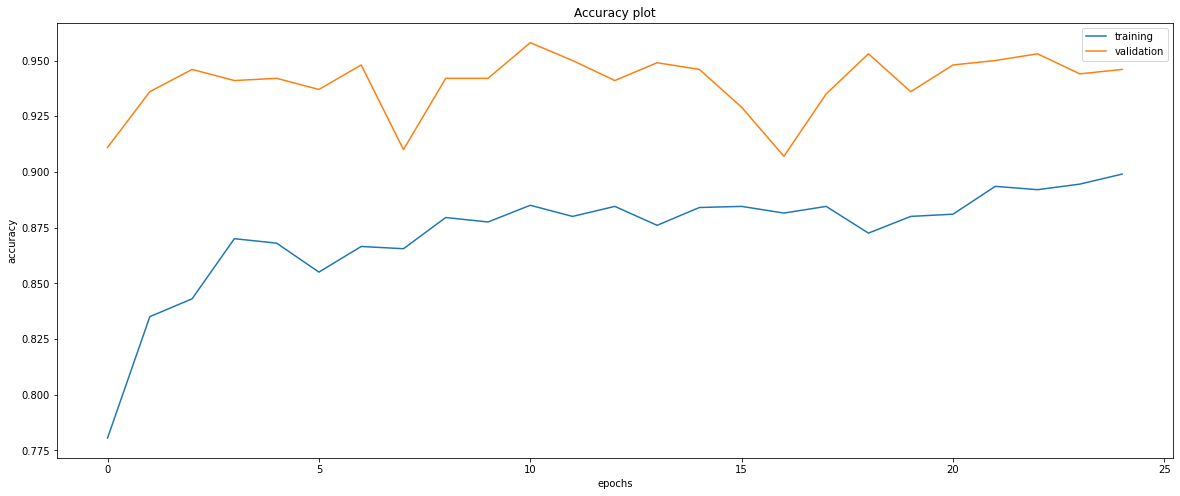

In [65]:
plot_accuracy(history = history)

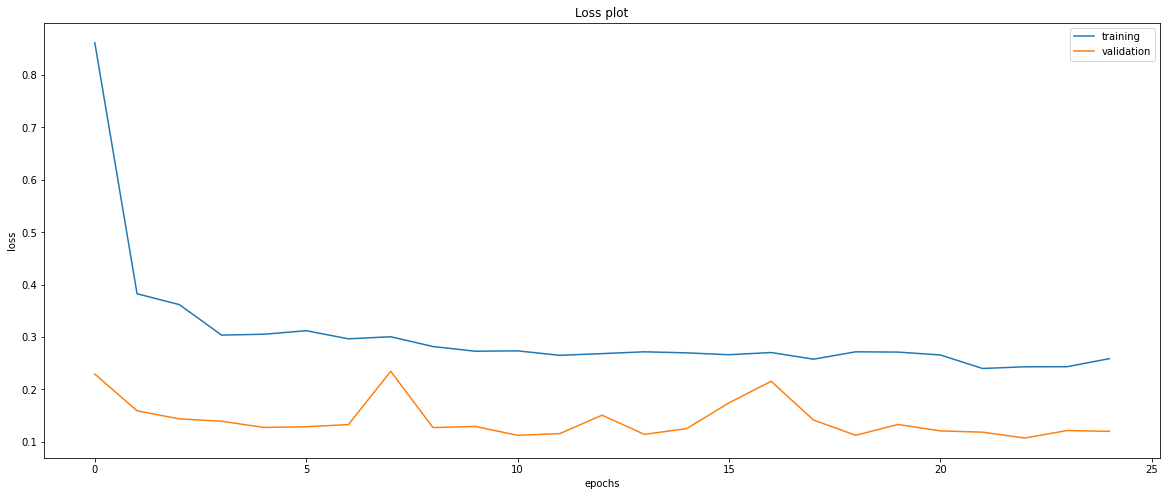

In [66]:
plot_loss(history=history)

In [67]:
predict_for_new_images(train_gen=train_gen, model=model)

Saving pexels-miguel-constantin-montes-2623968.jpg to pexels-miguel-constantin-montes-2623968 (2).jpg
Saving pexels-kasuma-933498.jpg to pexels-kasuma-933498 (2).jpg
Saving pexels-helena-lopes-2253275.jpg to pexels-helena-lopes-2253275 (2).jpg
Saving pexels-valeria-boltneva-1805164.jpg to pexels-valeria-boltneva-1805164 (3).jpg
Saving cat-g1eddff5da_640.jpg to cat-g1eddff5da_640 (2).jpg
Saving cat-g084e3b60f_640.jpg to cat-g084e3b60f_640 (2).jpg
file: pexels-miguel-constantin-montes-2623968.jpg belongs to dogs
file: pexels-kasuma-933498.jpg belongs to dogs
file: pexels-helena-lopes-2253275.jpg belongs to dogs
file: pexels-valeria-boltneva-1805164.jpg belongs to cats
file: cat-g1eddff5da_640.jpg belongs to cats
file: cat-g084e3b60f_640.jpg belongs to cats


# Transfer Learning and Dropout

## Neural Network

In [68]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-11 17:42:53--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 64.233.189.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  22.6MB/s    in 3.7s    

2022-05-11 17:42:57 (22.6 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [69]:
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, weights=None, input_shape=target_size+(3,))
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_291 (Conv2D)            (None, 74, 74, 32)   864         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_282 (Batch  (None, 74, 74, 32)  96          ['conv2d_291[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [70]:
pre_trained_model.load_weights('/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [71]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [72]:
input = tf.keras.layers.Input(shape = target_size+(3, ))
x = tf.keras.layers.Rescaling(scale = 1/255)(input)
x = pre_trained_model(x)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dense(units=512, activation='relu')(x)
x = tf.keras.layers.Dropout(rate=.2)(x)
x = tf.keras.layers.Dense(units=1, activation = 'sigmoid')(x)
model = tf.keras.Model(input, x)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_7 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_max_pooling2d_4 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 dense_12 (Dense)            (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                           

## Train the Model

In [73]:
train_gen = get_train_gen_with_augmentation()
validation_gen = get_validation_gen()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [74]:
# compile
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ["accuracy"])
# fit
history = model.fit(train_gen, epochs=epochs, validation_data=validation_gen )

Epoch 1/25
63/63 [==============================] - 28s 371ms/step - loss: 1.9348 - accuracy: 0.7235 - val_loss: 0.1853 - val_accuracy: 0.9200
Epoch 2/25
63/63 [==============================] - 22s 349ms/step - loss: 0.3601 - accuracy: 0.8375 - val_loss: 0.1388 - val_accuracy: 0.9410
Epoch 3/25
63/63 [==============================] - 21s 330ms/step - loss: 0.3475 - accuracy: 0.8365 - val_loss: 0.1312 - val_accuracy: 0.9440
Epoch 4/25
63/63 [==============================] - 21s 338ms/step - loss: 0.2967 - accuracy: 0.8625 - val_loss: 0.1198 - val_accuracy: 0.9490
Epoch 5/25
63/63 [==============================] - 21s 331ms/step - loss: 0.3354 - accuracy: 0.8415 - val_loss: 0.1705 - val_accuracy: 0.9220
Epoch 6/25
63/63 [==============================] - 21s 335ms/step - loss: 0.3191 - accuracy: 0.8515 - val_loss: 0.1277 - val_accuracy: 0.9410
Epoch 7/25
63/63 [==============================] - 21s 332ms/step - loss: 0.2920 - accuracy: 0.8640 - val_loss: 0.1342 - val_accuracy: 0.9350

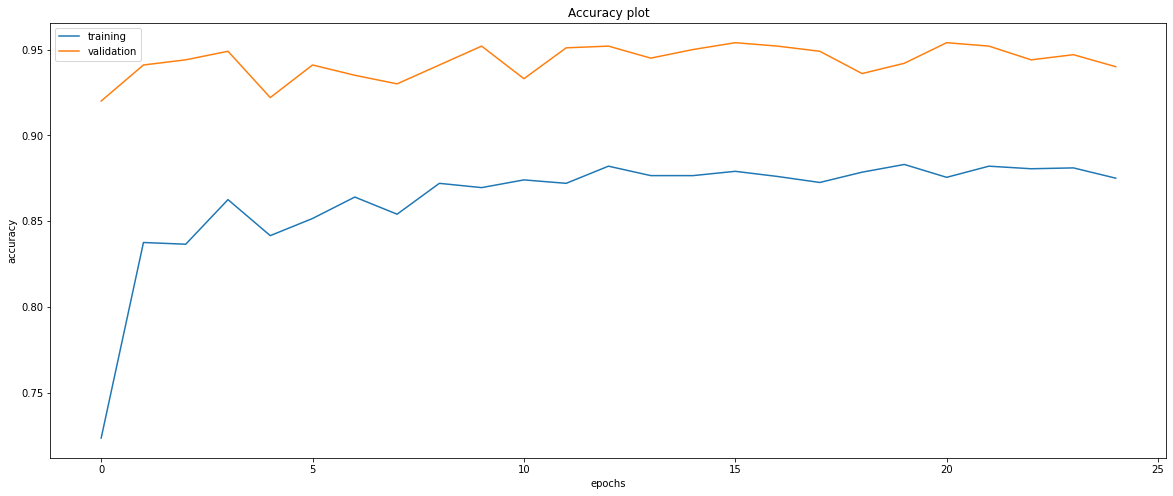

In [75]:
plot_accuracy(history = history)

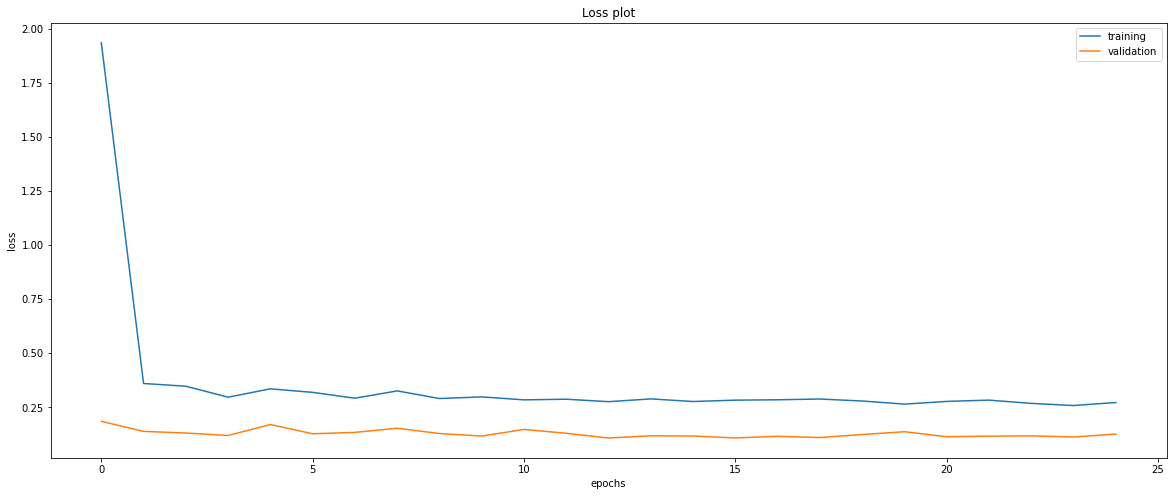

In [76]:
plot_loss(history=history)

In [77]:
predict_for_new_images(train_gen=train_gen, model=model)

Saving pexels-miguel-constantin-montes-2623968.jpg to pexels-miguel-constantin-montes-2623968 (3).jpg
Saving pexels-kasuma-933498.jpg to pexels-kasuma-933498 (3).jpg
Saving pexels-helena-lopes-2253275.jpg to pexels-helena-lopes-2253275 (3).jpg
Saving pexels-valeria-boltneva-1805164.jpg to pexels-valeria-boltneva-1805164 (4).jpg
Saving cat-g1eddff5da_640.jpg to cat-g1eddff5da_640 (3).jpg
Saving cat-g084e3b60f_640.jpg to cat-g084e3b60f_640 (3).jpg
file: pexels-miguel-constantin-montes-2623968.jpg belongs to dogs
file: pexels-kasuma-933498.jpg belongs to dogs
file: pexels-helena-lopes-2253275.jpg belongs to dogs
file: pexels-valeria-boltneva-1805164.jpg belongs to cats
file: cat-g1eddff5da_640.jpg belongs to cats
file: cat-g084e3b60f_640.jpg belongs to cats
